In [26]:
import pickle as pickle
from helpers import *
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.utils.data_utils import get_file
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Visualization
Let's first visualize our dataset and see what it looks like

In [2]:
# How big will our views be?
view_size = 5
border = (view_size - 1) / 2

In [3]:
# Load map and training data
training_data = pickle.load(open('data/test1-train-data.pickle', 'rb'))
M = pickle.load(open('data/test1-map.pickle', 'rb'))

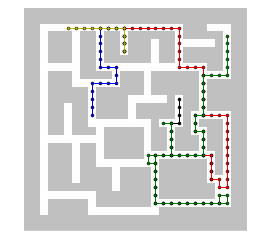

In [4]:
colors='krgby'
for c, path in zip(colors, training_data[10:15]):
    show_path(path, color=c)

show_map(M, True)

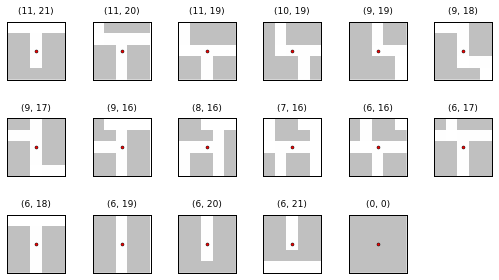

In [5]:
show_views(training_data[0][:18], M, size=view_size, plotsize=1.5)

# Preprocessing
Next, we need to preprocess the data. We have to turn paths into sequences of vectors where every vector represents the local context of a 5x5 area.

In [6]:
seq_len = 20
targets = []
sequences = []
for path in  training_data[:5000]:
    zerolist = [0] * (view_size*view_size)
    
    if len(path) <= seq_len:
        path_matrix = []
        for p in path:
            p_vector = list(get_view(p, M, size=view_size).flatten())
            path_matrix.append(p_vector)
            
        while len(path_matrix) < seq_len:
            path_matrix.append(zerolist)
        sequences.append(path_matrix)
        targets.append(zerolist)
    
    else:
        path_matrix = []
        for p in path:
            p_vector = list(get_view(p, M, size=view_size).flatten())
            path_matrix.append(p_vector)
        
        for i in range(len(path) - seq_len - 1):
            sequences.append(path_matrix[i:i+seq_len])
            targets.append(path_matrix[-1])
        
sequences = np.array(sequences, dtype=np.bool)
targets = np.array(targets, dtype=np.bool)

In [24]:
model = Sequential()
model.add(LSTM(50, return_sequences=False, 
         input_shape=(seq_len, view_size*view_size)))
model.add(Dropout(0.2))
model.add(Dense(view_size*view_size))
model.add(Activation('sigmoid'))

model.compile(loss="mean_squared_error", optimizer="adam")

In [39]:
# Train the model!
model.fit(sequences, targets, batch_size=500, nb_epoch=100, verbose=0)
time.sleep(0.1)

In [40]:
test = []
for p in path[:20]:
    p_vector = list(get_view(p, M, size=view_size).flatten())
    test.append(p_vector)
test = np.array([test])
test.shape

(1, 20, 25)

In [41]:
pred = model.predict([test])

In [46]:
pred

array([[ 0.06503274,  0.06234716,  0.13853937,  0.06426764,  0.06801032,
         0.05622429,  0.06146559,  0.16421834,  0.04005959,  0.0518083 ,
         0.10913586,  0.12763382,  0.26861691,  0.14110288,  0.13125852,
         0.06083004,  0.04899644,  0.16924557,  0.06058617,  0.05248361,
         0.05337154,  0.05735446,  0.13623619,  0.06963217,  0.06230379]])

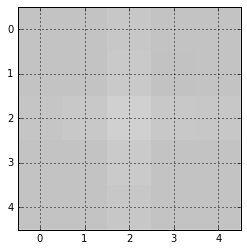

In [44]:
show_map(pred.reshape(5,5))

25


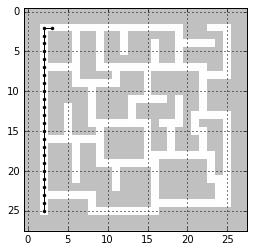

In [34]:
path = generate_path((2,25), 25, M)
show_path(path)
print len(path)
show_map(M)